In [2]:
import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import scipy.optimize

import minkowski_tools as mt

In [3]:
def rms(x):
    return np.sqrt(x.dot(x)/x.size)

In [2]:
import importlib
importlib.reload(mt)

<module 'minkowski_tools' from '/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py'>

In [244]:
n = 10000
ps = np.arange(0.5, 1.55, 0.05)
ns = [n]*len(ps)
rs = mt.norm_kernel_2D(ps, 5/n)
mt.separate_simulations(ns, ps, rs, savename='test_func.txt')

n-10000, p-0.5, r-0.05477220097834299
Generated points.

/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:103: RuntimeWarning: invalid value encountered in sqrt
  distsp = (x_diffs**pval + y_diffs**pval)*(x_diffs>0)*(y_diffs>0)
/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:104: RuntimeWarning: invalid value encountered in less
  connections = (((distsp<radp)*distsp)**(1/pval))*(x_diffs>0)*(y_diffs>0)


Got connections.
Getting paths....Longest....Shortest....Saving file -> test_func.txt
n-10000, p-0.55, r-0.04930153791496095
Generated points.

/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:103: RuntimeWarning: invalid value encountered in power
  distsp = (x_diffs**pval + y_diffs**pval)*(x_diffs>0)*(y_diffs>0)


Got connections.
Getting paths....Longest....Shortest....Saving file -> test_func.txt
n-10000, p-0.6000000000000001, r-0.045226095249907707
Generated points.Got connections.
Getting paths....Longest....Shortest....Saving file -> test_func.txt
n-10000, p-0.6500000000000001, r-0.04209065871728356
Generated points.Got connections.
Getting paths....Longest....Shortest....Saving file -> test_func.txt
n-10000, p-0.7000000000000002, r-0.03961491319486234
Generated points.Got connections.
Getting paths....Longest....Shortest....Saving file -> test_func.txt
n-10000, p-0.7500000000000002, r-0.03761802360384738
Generated points.Got connections.
Getting paths....Longest....Shortest....Saving file -> test_func.txt
n-10000, p-0.8000000000000003, r-0.03597839297223089
Generated points.Got connections.
Getting paths....Longest....Shortest....Saving file -> test_func.txt
n-10000, p-0.8500000000000003, r-0.03461169170392771
Generated points.Got connections.
Getting paths....Longest....Shortest....Saving

True

In [371]:
all_runs = pd.read_csv('test_func.txt', header=None, delimiter=" - ", names=mt.headers)
all_runs.shape
all_runs.round({'p': 2})

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,p,r,n,short_lengthBool,long_lengthBool,short_length,long_length,short_pathBoolpoints,long_pathBoolpoints,short_pathpoints,long_pathpoints
0,0.80,0.080450,2000,31.0,39.0,2.106931,2.262005,"[[1.0, 1.0], [0.9740970618984705, 0.9724339587...","[[1.0, 1.0], [0.9894497289342215, 0.9916729835...","[[1.0, 1.0], [0.9894497289342215, 0.9916729835...","[[1.0, 1.0], [0.9740970618984705, 0.9724339587..."
1,0.85,0.077394,2000,31.0,45.0,2.076668,2.177865,"[[1.0, 1.0], [0.9864179385118497, 0.9647771259...","[[1.0, 1.0], [0.9864179385118497, 0.9647771259...","[[1.0, 1.0], [0.9864179385118497, 0.9647771259...","[[1.0, 1.0], [0.9864179385118497, 0.9647771259..."
2,0.90,0.074814,2000,32.0,43.0,2.040722,2.112964,"[[1.0, 1.0], [0.9898748553026778, 0.9702677342...","[[1.0, 1.0], [0.9898748553026778, 0.9702677342...","[[1.0, 1.0], [0.9898748553026778, 0.9702677342...","[[1.0, 1.0], [0.9898748553026778, 0.9702677342..."
3,0.95,0.072610,2000,32.0,41.0,2.019957,2.043791,"[[1.0, 1.0], [0.9748584229893716, 0.9774815397...","[[1.0, 1.0], [0.9927737191769709, 0.9659217697...","[[1.0, 1.0], [0.9927737191769709, 0.9659217697...","[[1.0, 1.0], [0.9698888872040029, 0.9747698329..."
4,1.00,0.070711,2000,31.0,44.0,2.000000,2.000000,"[[1.0, 1.0], [0.9838402405808921, 0.9458584857...","[[1.0, 1.0], [0.9912684723671841, 0.9663231467...","[[1.0, 1.0], [0.9646208604668208, 0.9879830681...","[[1.0, 1.0], [0.9912684723671841, 0.9663231467..."
5,1.05,0.069059,2000,31.0,44.0,1.937246,1.957874,"[[1.0, 1.0], [0.9752704313457875, 0.9608644845...","[[1.0, 1.0], [0.9839472053593568, 0.9901561576...","[[1.0, 1.0], [0.9838714601616747, 0.9742340072...","[[1.0, 1.0], [0.978123873053921, 0.95756121503..."
6,1.10,0.067611,2000,32.0,44.0,1.882018,1.910695,"[[1.0, 1.0], [0.9783518548291524, 0.9800043007...","[[1.0, 1.0], [0.9783518548291524, 0.9800043007...","[[1.0, 1.0], [0.9783518548291524, 0.9800043007...","[[1.0, 1.0], [0.9825878129378194, 0.9612292920..."
7,1.15,0.066334,2000,31.0,39.0,1.832894,1.867719,"[[1.0, 1.0], [0.9674232512517247, 0.9793583354...","[[1.0, 1.0], [0.9805838031816996, 0.9912422412...","[[1.0, 1.0], [0.9762760141747377, 0.9537390297...","[[1.0, 1.0], [0.9470233106221041, 0.9945919711..."
8,0.80,0.080450,4000,29.0,44.0,2.062074,2.261350,"[[1.0, 1.0], [0.9653272781181138, 0.9823708126...","[[1.0, 1.0], [0.9876232607698674, 0.9988545050...","[[1.0, 1.0], [0.9263804648713456, 0.9995561751...","[[1.0, 1.0], [0.9793046664909343, 0.9808518107..."
9,0.85,0.077394,4000,30.0,41.0,2.051585,2.175985,"[[1.0, 1.0], [0.9811573620137561, 0.9632138705...","[[1.0, 1.0], [0.9924064718794291, 0.9549743909...","[[1.0, 1.0], [0.9924064718794291, 0.9549743909...","[[1.0, 1.0], [0.9585637631801798, 0.9746769058..."


In [378]:
n=4000
connected_runs = all_runs[all_runs['long_lengthBool'] > 0]
data = connected_runs[(connected_runs['n'] == n) & (connected_runs['r'] == mt.norm_kernel_2D(connected_runs['p'], 5/connected_runs['n']))]

print(data.shape)
data.head()

(62, 11)


,p,r,n,short_lengthBool,long_lengthBool,short_length,long_length,short_pathBoolpoints,long_pathBoolpoints,short_pathpoints,long_pathpoints
40,0.80,0.056887,4000,44.0,61.0,2.095930,2.282988,"[[1.0, 1.0], [0.9874935596965132, 0.9940186510...","[[1.0, 1.0], [0.9874935596965132, 0.9940186510...","[[1.0, 1.0], [0.9996034765495839, 0.9881304308...","[[1.0, 1.0], [0.9808809426200478, 0.9804994395..."
41,0.85,0.054726,4000,43.0,57.0,2.065468,2.169792,"[[1.0, 1.0], [0.9985070725213195, 0.9562967449...","[[1.0, 1.0], [0.9978290171352883, 0.9601653957...","[[1.0, 1.0], [0.9924480932173582, 0.9976790513...","[[1.0, 1.0], [0.9831999052940429, 0.9680588855..."
43,0.95,0.051343,4000,43.0,61.0,2.017360,2.048525,"[[1.0, 1.0], [0.9867459410969528, 0.9715240326...","[[1.0, 1.0], [0.9984480851627904, 0.9844130122...","[[1.0, 1.0], [0.9984480851627904, 0.9844130122...","[[1.0, 1.0], [0.9867459410969528, 0.9715240326..."
44,1.00,0.050000,4000,44.0,58.0,2.000000,2.000000,"[[1.0, 1.0], [0.9816189400588305, 0.9858510715...","[[1.0, 1.0], [0.9990688101395966, 0.9742705163...","[[1.0, 1.0], [0.9845986880262312, 0.9673815733...","[[1.0, 1.0], [0.9990688101395966, 0.9742705163..."
46,1.10,0.047808,4000,44.0,60.0,1.883386,1.907126,"[[1.0, 1.0], [0.978220397656843, 0.97541402502...","[[1.0, 1.0], [0.9670407063454397, 0.9900884319...","[[1.0, 1.0], [0.9670407063454397, 0.9900884319...","[[1.0, 1.0], [0.9670407063454397, 0.9900884319..."


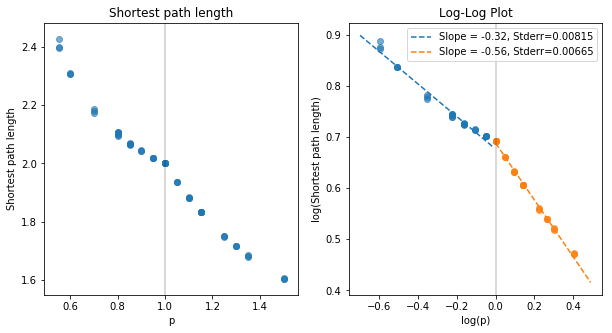

In [430]:
sub = data[data['p'] < 1]
sup = data[data['p'] > 1]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.scatter(data['p'], data['short_length'], alpha=0.6)
ax1.axvline(x=1, alpha=0.2, c='k')
ax1.set(xlabel='p', ylabel='Shortest path length', title='Shortest path length')

ax2.scatter(np.log(sub['p']), np.log(sub['short_length']), label='', alpha=0.6)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.log(sub['p']), np.log(sub['short_length']))
subx = np.arange(-.7, 0, 0.01)
ax2.plot(subx, slope*subx+intercept, label=f'Slope = {slope:.2}, Stderr={std_err:.3}', ls='--')

ax2.scatter(np.log(sup['p']), np.log(sup['short_length']), label='', alpha=0.6)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.log(sup['p']), np.log(sup['short_length']))
supx = np.arange(0, 0.5, 0.01)
ax2.plot(supx, slope*supx+intercept, label=f'Slope = {slope:.2}, Stderr={std_err:.3}', ls='--')

ax2.axvline(x=0, alpha=0.2, c='k')
ax2.set(xlabel='log(p)', ylabel='log(Shortest path length)', title='Log-Log Plot')

ax2.legend()
# plt.savefig('img/Shortpathlength.pdf')

In [380]:
ps = [p for p in data['p']]
angs = [mt.path_angles(mt.points_str(path)) for path in data['short_pathBoolpoints']]

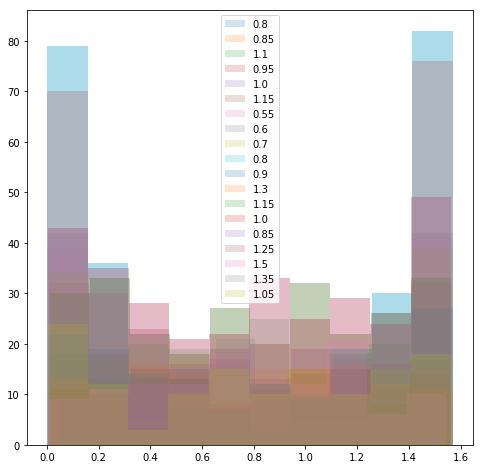

In [392]:
fig, ax = plt.subplots(figsize=(8, 8))

hist_data = {np.round(p, 2):[] for p in ps}

for ang, p in zip(angs, ps):
    hist_data[np.round(p, 2)].extend(ang)
    
[ax.hist(hist_data[np.round(p, 2)], label=np.round(p, 2), alpha=0.2) for p in set(ps)]

ax.legend()

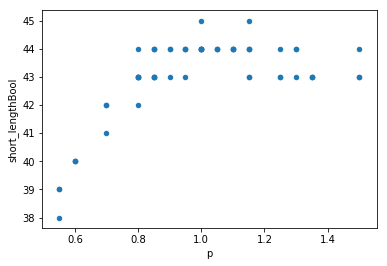

In [408]:
data.plot.scatter(x='p', y='short_lengthBool')

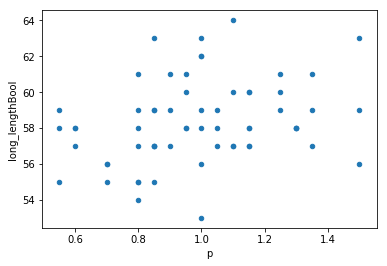

In [409]:
data.plot.scatter(x='p', y='long_lengthBool')

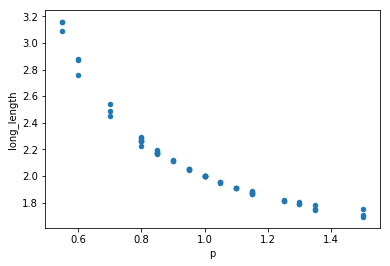

In [414]:
data.plot.scatter(x='p', y='long_length')

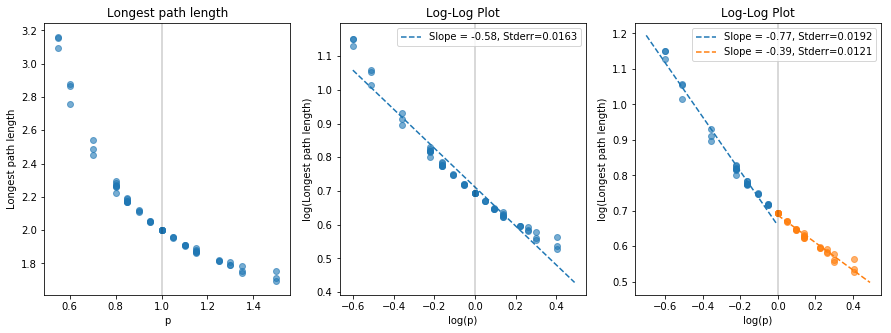

In [429]:
fig, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize=(15, 5))

ax1.scatter(data['p'], data['long_length'], alpha=0.6)
ax1.axvline(x=1, alpha=0.2, c='k')
ax1.set(xlabel='p', ylabel='Longest path length', title='Longest path length')
ax2.scatter(np.log(data['p']), np.log(data['long_length']), label='', alpha=0.6)

slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.log(data['p']), np.log(data['long_length']))
x = np.arange(-0.6, 0.5, 0.01)
ax2.plot(x, slope*x+intercept, label=f'Slope = {slope:.2}, Stderr={std_err:.3}', ls='--')

ax2.axvline(x=0, alpha=0.2, c='k')
ax2.set(xlabel='log(p)', ylabel='log(Longest path length)', title='Log-Log Plot')

ax2.legend()

sub = data[data['p'] < 1]
sup = data[data['p'] > 1]

ax3.scatter(np.log(sub['p']), np.log(sub['long_length']), label='', alpha=0.6)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.log(sub['p']), np.log(sub['long_length']))
subx = np.arange(-.7, 0, 0.01)
ax3.plot(subx, slope*subx+intercept, label=f'Slope = {slope:.2}, Stderr={std_err:.3}', ls='--')

ax3.scatter(np.log(sup['p']), np.log(sup['long_length']), label='', alpha=0.6)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.log(sup['p']), np.log(sup['long_length']))
supx = np.arange(0, 0.5, 0.01)
ax3.plot(supx, slope*supx+intercept, label=f'Slope = {slope:.2}, Stderr={std_err:.3}', ls='--')

ax3.axvline(x=0, alpha=0.2, c='k')
ax3.set(xlabel='log(p)', ylabel='log(Longest path length)', title='Log-Log Plot')

ax3.legend()

# plt.savefig('img/Longpathlength.pdf')

In [11]:
all_dim_data = pd.read_csv('outputs/dimensionrun.txt', header=None, delimiter=" - ", names=mt.headers)
dim_data = all_dim_data[all_dim_data['p'] == 0.8]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [13]:
dim_data.head()

,p,r,n,short_lengthBool,long_lengthBool,short_length,long_length,short_pathBoolpoints,long_pathBoolpoints,short_pathpoints,long_pathpoints
0,0.8,0.113774,1000,22.0,28.0,2.115609,2.260755,"[[1.0, 1.0], [0.9843242834013883, 0.9281974441...","[[1.0, 1.0], [0.9414543382231766, 0.9943072745...","[[1.0, 1.0], [0.9843242834013883, 0.9281974441...","[[1.0, 1.0], [0.9414543382231766, 0.9943072745..."
1,0.8,0.080450,2000,31.0,44.0,2.099938,2.240042,"[[1.0, 1.0], [0.9804764809318938, 0.9677866416...","[[1.0, 1.0], [0.9878395161056946, 0.9950105966...","[[1.0, 1.0], [0.9878395161056946, 0.9950105966...","[[1.0, 1.0], [0.9804764809318938, 0.9677866416..."
2,0.8,0.065687,3000,38.0,50.0,2.096049,2.269583,"[[1.0, 1.0], [0.9906582786236341, 0.9675479554...","[[1.0, 1.0], [0.9958992558004769, 0.9689323061...","[[1.0, 1.0], [0.9811340348453143, 0.9921733010...","[[1.0, 1.0], [0.9726675759002168, 0.9935582125..."
3,0.8,0.056887,4000,43.0,58.0,2.096862,2.248929,"[[1.0, 1.0], [0.9878840037460921, 0.9766624087...","[[1.0, 1.0], [0.9899019584567065, 0.9882822097...","[[1.0, 1.0], [0.9995526302205527, 0.9470634875...","[[1.0, 1.0], [0.9878840037460921, 0.9766624087..."
4,0.8,0.050881,5000,48.0,63.0,2.099730,2.282994,"[[1.0, 1.0], [0.988846583298821, 0.99366083023...","[[1.0, 1.0], [0.9981197088067235, 0.9937808258...","[[1.0, 1.0], [0.9981197088067235, 0.9937808258...","[[1.0, 1.0], [0.988846583298821, 0.99366083023..."


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


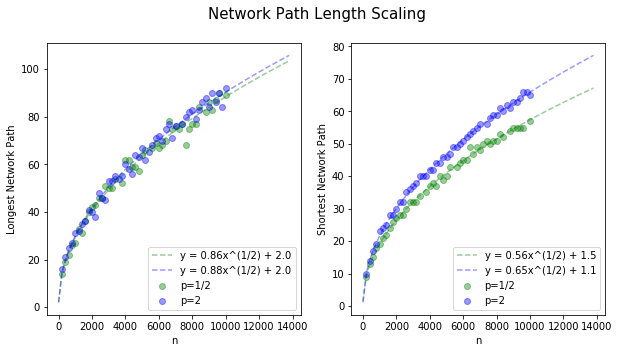

In [205]:
def func(x, a, b):
    return a*np.sqrt(x) + b

all_new_dim_data = pd.read_csv('outputs/p2dimmore.txt', header=None, delimiter=" - ", names=mt.headers)
new_dim_data = all_new_dim_data[all_new_dim_data['long_lengthBool'] > 0]
p2 = new_dim_data[new_dim_data['p'] == 2]
phalf= new_dim_data[new_dim_data['p'] == .5]

fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(10, 5))

x = np.arange(0, 14000, 200)

ax1.scatter(phalf['n'], phalf['long_lengthBool'], label='p=1/2', c='g', alpha=0.4)
long_half, _ = sp.optimize.curve_fit(func, phalf['n'], phalf['long_lengthBool'])
ax1.plot(x, func(x, *long_half), ls='--',  label=f'y = {long_half[0]:.2}x^(1/2) + {long_half[1]:.2}', c='g', alpha=0.4)

ax1.scatter(p2['n'], p2['long_lengthBool'], label='p=2', c='b', alpha=0.4)
long_2, _ = sp.optimize.curve_fit(func, p2['n'], p2['long_lengthBool'])
ax1.plot(x, func(x, *long_2), ls='--',  label=f'y = {long_2[0]:.2}x^(1/2) + {long_2[1]:.2}', c='b', alpha=0.4)


ax2.scatter(phalf['n'], phalf['short_lengthBool'], label='p=1/2', c='g', alpha=0.4)
short_half, _ = sp.optimize.curve_fit(func, phalf['n'], phalf['short_lengthBool'])
ax2.plot(x, func(x, *short_half), ls='--',  label=f'y = {short_half[0]:.2}x^(1/2) + {short_half[1]:.2}', c='g', alpha=0.4)


ax2.scatter(p2['n'], p2['short_lengthBool'], label='p=2', c='b', alpha=0.4)
short_2, _ = sp.optimize.curve_fit(func, p2['n'], p2['short_lengthBool'])
ax2.plot(x, func(x, *short_2), ls='--',  label=f'y = {short_2[0]:.2}x^(1/2) + {short_2[1]:.2}', c='b', alpha=0.4)


# slope, intercept, r_value, p_value, std_err = sp.stats.linregress(dim_data['n'], dim_data['long_lengthBool'])
# ax1.plot(x, slope*x+intercept, label=f'y = {slope:.2}x + {intercept:.2}', ls='--')

# popt, pcov = sp.optimize.curve_fit(func, dim_data['n'], dim_data['short_lengthBool'])
# ax2.plot(x, func(x, *popt), ls='--',  label=f'y = {popt[0]:.2}x^(1/2) + {popt[1]:.2}')

# new_slope, new_intercept, new_r_value, new_p_value, new_std_err = sp.stats.linregress(new_dim_data['n'], new_dim_data['long_lengthBool'])
# ax1.plot(x, new_slope*x+new_intercept, label=f'y = {new_slope:.2}x + {new_intercept:.2}', ls='--')

# new_popt, new_pcov = sp.optimize.curve_fit(func, new_dim_data['n'], new_dim_data['short_lengthBool'])
# ax2.plot(x, func(x, *new_popt), ls='--',  label=f'y = {new_popt[0]:.2}x^(1/2) + {new_popt[1]:.2}')

ax2.set(xlabel='n', ylabel='Shortest Network Path') #title='Shortest Network Path', 
ax2.legend()

ax1.set(xlabel='n', ylabel='Longest Network Path') #title='Longest Network Path', 
ax1.legend()

fig.suptitle('Network Path Length Scaling', size=15);
plt.savefig('img/cleanscaling.pdf')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


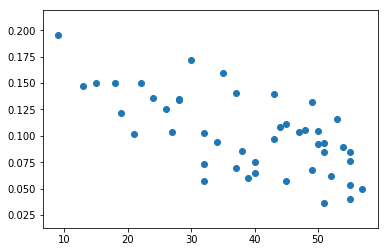

In [212]:
short_paths = [mt.points_str(pointstr) for pointstr in phalf['short_pathpoints']]        
short_diffs = [path[0]-path[1] for path in short_paths]
short_stds = [np.std(diff) for diff in short_diffs]

short_pathsBool = [mt.points_str(pointstr) for pointstr in phalf['short_pathBoolpoints']]        
short_diffsBool = [path[0]-path[1] for path in short_pathsBool]
short_stdsBool = [np.std(diff) for diff in short_diffsBool]

phalf['short_stdsBool'] = short_stdsBool
phalf['short_stds'] = short_stds

plt.scatter(phalf['short_lengthBool'], phalf['short_stdsBool'])

In [599]:
all_newrun = pd.read_csv('newrun.txt', header=None, delimiter=" - ", names=mt.headers)
newrun = all_newrun[all_newrun['long_lengthBool']>0]
newrun.head()
# plt.scatter(dim_data['n'], dim_data['long_lengthBool'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,p,r,n,short_lengthBool,long_lengthBool,short_length,long_length,short_pathBoolpoints,long_pathBoolpoints,short_pathpoints,long_pathpoints
0,0.50,0.054772,10000,59.0,90.0,2.522375,3.419910,"[[1.0, 1.0], [0.9959100200969712, 0.9913712408...","[[1.0, 1.0], [0.9959100200969712, 0.9913712408...","[[1.0, 1.0], [0.9959100200969712, 0.9913712408...","[[1.0, 1.0], [0.997752137772247, 0.97702574480..."
1,0.51,0.053536,10000,58.0,93.0,2.467962,3.385560,"[[1.0, 1.0], [0.9810491084132017, 0.9975864150...","[[1.0, 1.0], [0.993911805175879, 0.99985531905...","[[1.0, 1.0], [0.9947805727317309, 0.9967993985...","[[1.0, 1.0], [0.9810491084132017, 0.9975864150..."
2,0.52,0.052376,10000,59.0,84.0,2.438077,3.226024,"[[1.0, 1.0], [0.9952190212467383, 0.9737342596...","[[1.0, 1.0], [0.9959219551173405, 0.9984344370...","[[1.0, 1.0], [0.9993666545167119, 0.9863377320...","[[1.0, 1.0], [0.9938968980314278, 0.9766142885..."
4,0.54,0.050265,10000,58.0,86.0,2.384950,3.039199,"[[1.0, 1.0], [0.9870767172489514, 0.9942968675...","[[1.0, 1.0], [0.9903117713395266, 0.9956557956...","[[1.0, 1.0], [0.9980012488620479, 0.9963635136...","[[1.0, 1.0], [0.989958332189476, 0.98268395773..."
5,0.55,0.049302,10000,60.0,90.0,2.378848,3.031984,"[[1.0, 1.0], [0.9930141643989682, 0.9896845045...","[[1.0, 1.0], [0.9973163988931635, 0.9857392694...","[[1.0, 1.0], [0.9791534337942849, 0.9974901763...","[[1.0, 1.0], [0.9973163988931635, 0.9857392694..."


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


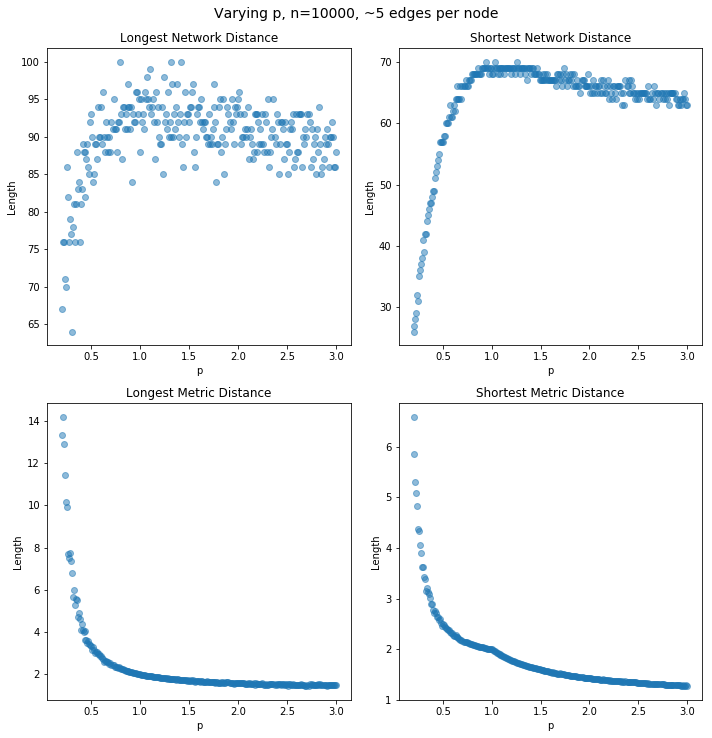

In [109]:
allbigrun = pd.read_csv('outputs/10000bigrange.txt', header=None, delimiter=" - ", names=mt.headers)
bigrun = allbigrun[allbigrun['long_length'] > 0]

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

lengths = ['long_lengthBool', 'short_lengthBool', 'long_length', 'short_length']
titles = ['Longest Network Distance', 'Shortest Network Distance', 'Longest Metric Distance', 'Shortest Metric Distance']

for ax, length, title in zip(axes.flatten(), lengths, titles):
    ax.scatter(bigrun['p'], bigrun[length], alpha=0.5)
    ax.set(xlabel='p', ylabel='Length', title=title)
fig.suptitle('Varying p, n=10000, ~5 edges per node', y=1.02, size=14)
plt.tight_layout()
plt.savefig('img/bigrunsummary.pdf')

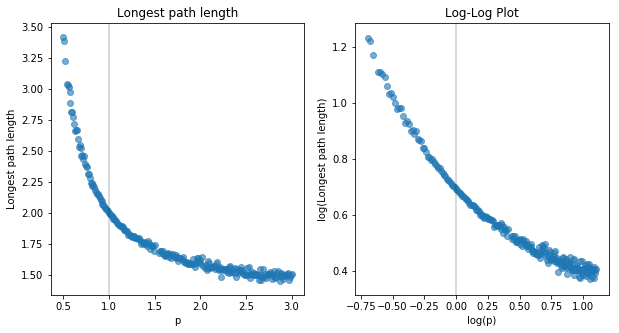

In [600]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(10, 5))

ax1.scatter(newrun['p'], newrun['long_length'], alpha=0.6)
ax1.axvline(x=1, alpha=0.2, c='k')
ax1.set(xlabel='p', ylabel='Longest path length', title='Longest path length')
ax2.scatter(np.log(newrun['p']), np.log(newrun['long_length']), label='', alpha=0.6)

ax2.axvline(x=0, alpha=0.2, c='k')
ax2.set(xlabel='log(p)', ylabel='log(Longest path length)', title='Log-Log Plot');

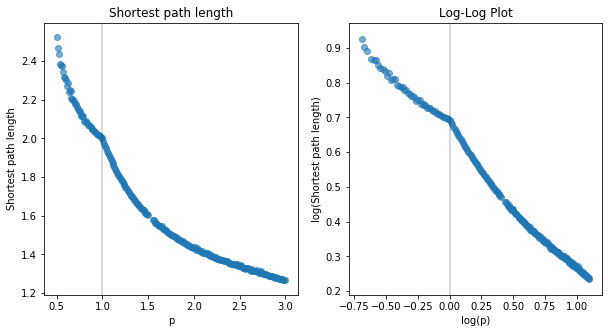

In [601]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(10, 5))

ax1.scatter(newrun['p'], newrun['short_length'], alpha=0.6)
ax1.axvline(x=1, alpha=0.2, c='k')
ax1.set(xlabel='p', ylabel='Shortest path length', title='Shortest path length')
ax2.scatter(np.log(newrun['p']), np.log(newrun['short_length']), label='', alpha=0.6)

ax2.axvline(x=0, alpha=0.2, c='k')
ax2.set(xlabel='log(p)', ylabel='log(Shortest path length)', title='Log-Log Plot');

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


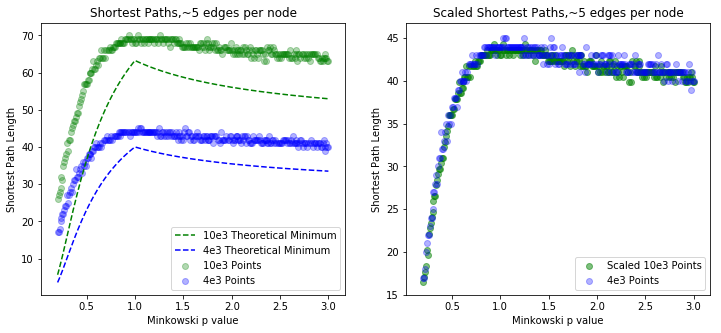

In [117]:
allbigrun = pd.read_csv('outputs/10000bigrange.txt', header=None, delimiter=" - ", names=mt.headers)
bigrun = allbigrun[allbigrun['long_length'] > 0]

all4k = pd.read_csv('outputs/4000bigrange.txt', header=None, delimiter=" - ", names=mt.headers)
k4 = all4k[all4k['long_length'] > 0].sort_values('p', axis=0)

theoretical10k = np.concatenate(((2/bigrun[bigrun['p'] < 1]['r']), (2**(1/bigrun[bigrun['p'] >= 1]['p'])/bigrun[bigrun['p'] >= 1]['r'])))
theoretical4k = np.concatenate(((2/k4[k4['p'] < 1]['r']), (2**(1/k4[k4['p'] >= 1]['p'])/k4[k4['p'] >= 1]['r'])))

fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(bigrun['p'], bigrun['short_lengthBool'], label='10e3 Points', alpha=0.3, c='g')
ax1.scatter(k4['p'], k4['short_lengthBool'], label='4e3 Points', alpha=0.3, c='b')
ax1.plot(bigrun['p'], theoretical10k, 'g--', label='10e3 Theoretical Minimum')
ax1.plot(k4['p'], theoretical4k, 'b--', label='4e3 Theoretical Minimum')
ax1.legend()
ax1.set(title='Shortest Paths,~5 edges per node', xlabel='Minkowski p value', ylabel='Shortest Path Length');

ax2.scatter(bigrun['p'], bigrun['short_lengthBool']/np.sqrt(2.5), label='Scaled 10e3 Points', alpha=0.5, c='g')
ax2.scatter(k4['p'], k4['short_lengthBool'], label='4e3 Points', alpha=0.3, c='b')
ax2.set(title='Scaled Shortest Paths,~5 edges per node', xlabel='Minkowski p value', ylabel='Shortest Path Length');
ax2.legend()

# plt.savefig('img/n_scale_short.pdf')

# less = bigrun[bigrun['p'] < 1]
# more = bigrun[bigrun['p'] >= 1]
# theoretical = np.concatenate(((2/less['r']), (2**(1/more['p'])/more['r'])))

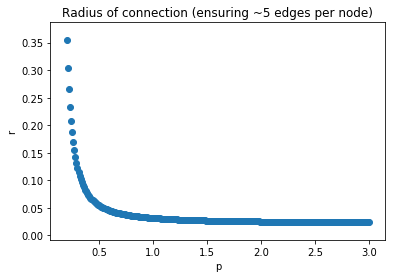

In [115]:
plt.scatter(bigrun['p'], bigrun['r'])
plt.gca().set(xlabel='p', ylabel='r', title='Radius of connection (ensuring ~5 edges per node)');

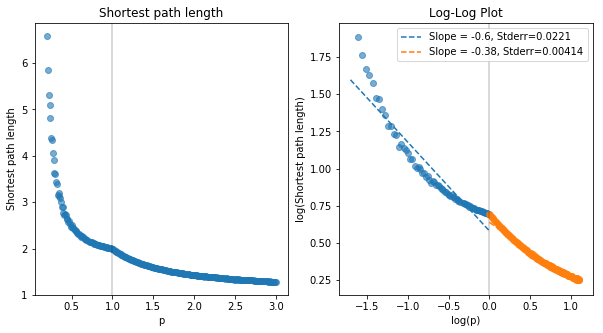

In [9]:
sub = bigrun[bigrun['p'] < 1]
sup = bigrun[bigrun['p'] > 1]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.scatter(bigrun['p'], bigrun['short_length'], alpha=0.6)
ax1.axvline(x=1, alpha=0.2, c='k')
ax1.set(xlabel='p', ylabel='Shortest path length', title='Shortest path length')

ax2.scatter(np.log(sub['p']), np.log(sub['short_length']), label='', alpha=0.6)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.log(sub['p']), np.log(sub['short_length']))
subx = np.arange(-1.7, 0, 0.01)
ax2.plot(subx, slope*subx+intercept, label=f'Slope = {slope:.2}, Stderr={std_err:.3}', ls='--')

ax2.scatter(np.log(sup['p']), np.log(sup['short_length']), label='', alpha=0.6)
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.log(sup['p']), np.log(sup['short_length']))
supx = np.arange(0, 0.5, 0.01)
ax2.plot(supx, slope*supx+intercept, label=f'Slope = {slope:.2}, Stderr={std_err:.3}', ls='--')

ax2.axvline(x=0, alpha=0.2, c='k')
ax2.set(xlabel='log(p)', ylabel='log(Shortest path length)', title='Log-Log Plot')

ax2.legend()
# plt.savefig('img/10000Shortpathlength.pdf')

In [19]:
def moving_average(a, n=3) :
    ret = np.cumsum(np.array(a))
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
 

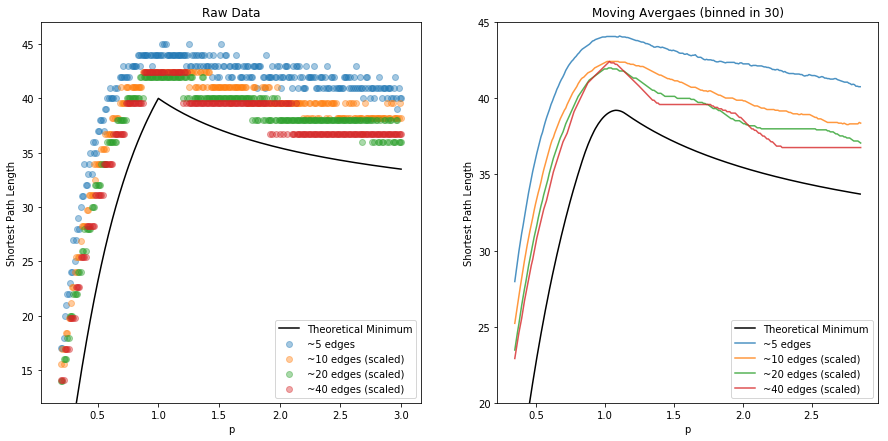

In [48]:
allten4k = pd.read_csv('outputs/4000_10bigrange.txt', header=None, delimiter=" - ", names=mt.headers)
ten4k = allten4k[allten4k['long_length'] > 0]

alltwenty4k = pd.read_csv('outputs/4000_20bigrange.txt', header=None, delimiter=" - ", names=mt.headers)
twenty4k = alltwenty4k[alltwenty4k['long_length'] > 0]

allfourty4k = pd.read_csv('outputs/4000_40bigrange.txt', header=None, delimiter=" - ", names=mt.headers)
fourty4k = allfourty4k[allfourty4k['short_lengthBool'] > 0]

theoretical4k = np.concatenate(((2/k4[k4['p'] < 1]['r']), (2**(1/k4[k4['p'] >= 1]['p'])/k4[k4['p'] >= 1]['r'])))

n_av = 30

fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(15, 7))


ax1.scatter(k4['p'], k4['short_lengthBool'], label='~5 edges', alpha=0.4)
ax1.scatter(ten4k['p'], np.sqrt(2)*ten4k['short_lengthBool'], label='~10 edges (scaled)', alpha=0.4)
ax1.scatter(twenty4k['p'], 2*twenty4k['short_lengthBool'], label='~20 edges (scaled)', alpha=0.4)
ax1.scatter(fourty4k['p'], np.sqrt(8)*fourty4k['short_lengthBool'], label='~40 edges (scaled)', alpha=0.4)
ax1.plot(k4['p'], theoretical4k, 'k', label='Theoretical Minimum') 

ax1.legend()
ax1.set(xlabel='p', ylabel='Shortest Path Length', ylim=(12, 47), title='Raw Data')

ax2.plot(moving_average(k4['p'], n_av), moving_average(theoretical4k, n_av), 'k', label='Theoretical Minimum')
ax2.plot(moving_average(k4['p'], n_av), moving_average(k4['short_lengthBool'], n_av), label='~5 edges', alpha=0.8)
ax2.plot(moving_average(ten4k['p'], n_av), moving_average(np.sqrt(2)*ten4k['short_lengthBool'], n_av), label='~10 edges (scaled)', alpha=0.8)
ax2.plot(moving_average(twenty4k['p'], n_av), moving_average(2*twenty4k['short_lengthBool'], n_av), label='~20 edges (scaled)', alpha=0.8)
ax2.plot(moving_average(fourty4k['p'], n_av), moving_average(np.sqrt(8)*fourty4k['short_lengthBool'], n_av), label='~40 edges (scaled)', alpha=0.8)

ax2.legend()
ax2.set(xlabel='p', ylabel='Shortest Path Length', ylim=(20, 45), title=f'Moving Avergaes (binned in {n_av})');

plt.savefig('img/shortBoolcomp.pdf')

In [25]:
fourty4k[(fourty4k['p'] - 1) < .1]

,p,r,n,short_lengthBool,long_lengthBool,short_length,long_length,short_pathBoolpoints,long_pathBoolpoints,short_pathpoints,long_pathpoints
0,0.20,1.587452,4000,5.0,16.0,4.684023,17.376895,"[[1.0, 1.0], [0.9999653442545893, 0.5193170582...","[[1.0, 1.0], [0.9957282096834216, 0.9936297667...","[[1.0, 1.0], [0.9957282096834216, 0.9936297667...","[[1.0, 1.0], [0.9999653442545893, 0.5193170582..."
1,0.21,1.361613,4000,5.0,21.0,4.057426,21.634492,"[[1.0, 1.0], [0.952039327176411, 0.94817168737...","[[1.0, 1.0], [0.9874029883700046, 0.9677561906...","[[1.0, 1.0], [0.9991606674730309, 0.9679481298...","[[1.0, 1.0], [0.9824331023452822, 0.9044557564..."
2,0.22,1.184887,4000,5.0,20.0,3.945429,14.169541,"[[1.0, 1.0], [0.997154081027921, 0.71375562941...","[[1.0, 1.0], [0.9997442399964526, 0.9793493902...","[[1.0, 1.0], [0.9997442399964526, 0.9793493902...","[[1.0, 1.0], [0.951338872455974, 0.96644146070..."
3,0.23,1.044098,4000,6.0,21.0,3.798735,14.668236,"[[1.0, 1.0], [0.9893359025193075, 0.8770270506...","[[1.0, 1.0], [0.973430254249585, 0.99030371370...","[[1.0, 1.0], [0.9999895627552595, 0.6504311278...","[[1.0, 1.0], [0.9658307648734316, 0.9560323196..."
4,0.24,0.930162,4000,6.0,18.0,3.623089,10.438376,"[[1.0, 1.0], [0.9926361121917227, 0.8182019095...","[[1.0, 1.0], [0.9947018899455621, 0.8378480652...","[[1.0, 1.0], [0.9998371838085627, 0.7500031901...","[[1.0, 1.0], [0.9548170321338411, 0.9411306386..."
5,0.25,0.836660,4000,6.0,17.0,3.447330,11.842953,"[[1.0, 1.0], [0.9986701977796877, 0.6788554200...","[[1.0, 1.0], [0.9830966608699182, 0.9456708929...","[[1.0, 1.0], [0.9982771679225431, 0.9645761832...","[[1.0, 1.0], [0.9298423860233226, 0.9806240804..."
6,0.26,0.758971,4000,6.0,19.0,3.252620,10.924581,"[[1.0, 1.0], [0.8506072618241749, 0.9901130154...","[[1.0, 1.0], [0.998212218398432, 0.89103009517...","[[1.0, 1.0], [0.7134382273922902, 0.9998770368...","[[1.0, 1.0], [0.9864400009937576, 0.8827429395..."
7,0.27,0.693700,4000,7.0,18.0,3.032419,9.307352,"[[1.0, 1.0], [0.8779288549498008, 0.9864435005...","[[1.0, 1.0], [0.8948356102824806, 0.9904440076...","[[1.0, 1.0], [0.9749179472538704, 0.9974965170...","[[1.0, 1.0], [0.9282980166224004, 0.9657576109..."
8,0.28,0.638313,4000,7.0,20.0,2.969361,7.721768,"[[1.0, 1.0], [0.8868233655907384, 0.9829662008...","[[1.0, 1.0], [0.9694665100824192, 0.9543622045...","[[1.0, 1.0], [0.977229698971428, 0.99982855529...","[[1.0, 1.0], [0.9633348166548911, 0.9695267034..."
9,0.29,0.590884,4000,7.0,24.0,2.955323,7.519651,"[[1.0, 1.0], [0.8426228567985874, 0.9930297490...","[[1.0, 1.0], [0.9607431845738511, 0.9926961184...","[[1.0, 1.0], [0.9998536691803067, 0.8804218167...","[[1.0, 1.0], [0.9300645587107556, 0.9709933215..."


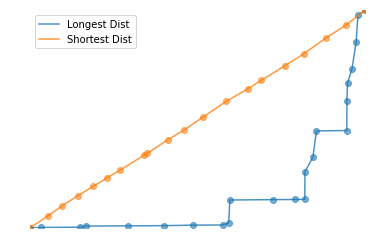

In [86]:
plt.figure()
ax = plt.gca()

mt.plot_path_points(ax, paths=[mt.points_str(fourty4k.iloc[89]['long_pathpoints']), mt.points_str(fourty4k.iloc[89]['short_pathpoints'])], path_labels=['Longest Dist', 'Shortest Dist'])

In [4]:
all_quick = pd.read_csv('outputs/quick_run.txt', header=None, delimiter=" - ", names=mt.headers)
quick = all_quick[(all_quick['long_length'] > 0) & (all_quick['short_lengthBool'] > 0)]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


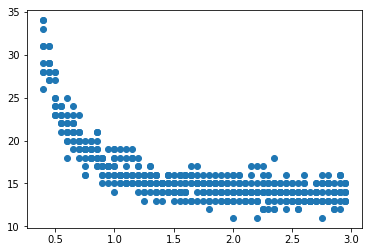

In [5]:
plt.scatter(quick['p'], quick['long_lengthBool'])

In [7]:
short_paths = [mt.points_str(pointstr) for pointstr in quick['short_pathpoints']]        
short_diffs = [path[0]-path[1] for path in short_paths]
short_stds = [rms(diff) for diff in short_diffs]

long_paths = [mt.points_str(pointstr) for pointstr in quick['long_pathpoints']]        
long_diffs = [path[0]-path[1] for path in long_paths]
long_stds = [rms(diff) for diff in long_diffs]

short_pathsBool = [mt.points_str(pointstr) for pointstr in quick['short_pathBoolpoints']]        
short_diffsBool = [path[0]-path[1] for path in short_pathsBool]
short_stdsBool = [rms(diff) for diff in short_diffsBool]

long_pathsBool = [mt.points_str(pointstr) for pointstr in quick['long_pathBoolpoints']]        
long_diffsBool = [path[0]-path[1] for path in long_pathsBool]
long_stdsBool = [rms(diff) for diff in long_diffsBool]

quick['long_stdsBool'] = long_stdsBool
quick['short_stdsBool'] = short_stdsBool
quick['long_stds'] = long_stds
quick['short_stds'] = short_stds

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

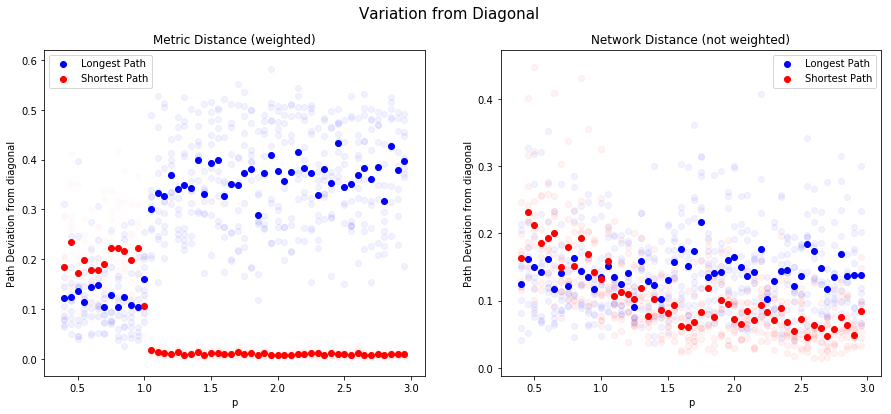

In [10]:
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(15, 6))

comparison_data = quick.groupby(['p', 'r', 'n']).mean().reset_index()

ax1.scatter(quick['p'], quick['long_stds'], label="", alpha=0.05, c='b')
ax1.scatter(quick['p'], quick['short_stds'], label="", alpha=0.015, c='r')
ax1.scatter(comparison_data['p'], comparison_data['long_stds'], label="Longest Path", alpha=1, c='b')
ax1.scatter(comparison_data['p'], comparison_data['short_stds'], label="Shortest Path", alpha=1, c='r')
# ax1.plot(comparison_data['p'], comparison_data['long_stds'], label="", alpha=.8, c='b')
# ax1.plot(comparison_data['p'], comparison_data['short_stds'], label="", alpha=.8, c='r')
ax1.set(xlabel='p', ylabel='Path Deviation from diagonal', title='Metric Distance (weighted)')
ax1.legend(loc='upper left')

ax2.scatter(quick['p'], quick['long_stdsBool'], label="", alpha=0.05, c='b')
ax2.scatter(quick['p'], quick['short_stdsBool'], label="", alpha=0.05, c='r')
ax2.scatter(comparison_data['p'], comparison_data['long_stdsBool'], label="Longest Path", alpha=1, c='b')
ax2.scatter(comparison_data['p'], comparison_data['short_stdsBool'], label="Shortest Path", alpha=1, c='r')
# ax2.plot(comparison_data['p'], comparison_data['long_stdsBool'], label="", alpha=.8, c='b')
# ax2.plot(comparison_data['p'], comparison_data['short_stdsBool'], label="", alpha=.8, c='r')
ax2.set(xlabel='p', ylabel='Path Deviation from diagonal', title='Network Distance (not weighted)')
ax2.legend(loc='upper right')

fig.suptitle('Variation from Diagonal', size=15)
plt.savefig('img/diagvariation.pdf')

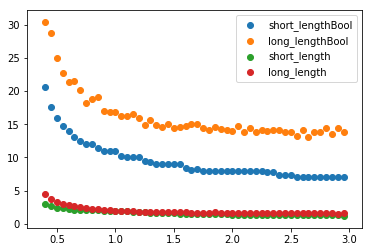

In [13]:
plt.scatter(comparison_data['p'], comparison_data['short_lengthBool'], label='short_lengthBool')
plt.scatter(comparison_data['p'], comparison_data['long_lengthBool'], label='long_lengthBool')
plt.scatter(comparison_data['p'], comparison_data['short_length'], label='short_length')
plt.scatter(comparison_data['p'], comparison_data['long_length'], label='long_length')
plt.legend()

In [71]:
min(quick['p']), max(quick['p'])

(0.4, 2.95)

In [144]:
quick

,p,r,n,short_lengthBool,long_lengthBool,short_length,long_length,short_pathBoolpoints,long_pathBoolpoints,short_pathpoints,long_pathpoints,long_stdsBool,short_stdsBool,long_stds,short_stds
0,0.40,0.2,1000,21.0,28.0,3.132713,4.288920,"[[1.0, 1.0], [0.9953814854901276, 0.9260207462...","[[1.0, 1.0], [0.9953814854901276, 0.9260207462...","[[1.0, 1.0], [0.9953814854901276, 0.9260207462...","[[1.0, 1.0], [0.9816311901965978, 0.9751538935...",0.074270,0.146277,0.090606,0.149950
1,0.45,0.2,1000,18.0,27.0,2.683042,3.890758,"[[1.0, 1.0], [0.9751976852966343, 0.9464307687...","[[1.0, 1.0], [0.9947929477535529, 0.9231430504...","[[1.0, 1.0], [0.9947929477535529, 0.9231430504...","[[1.0, 1.0], [0.9751976852966343, 0.9464307687...",0.169570,0.223146,0.084011,0.210922
2,0.50,0.2,1000,16.0,28.0,2.421655,3.389915,"[[1.0, 1.0], [0.9974733852728566, 0.9374820938...","[[1.0, 1.0], [0.9736357220237599, 0.9573202040...","[[1.0, 1.0], [0.9548252354690757, 0.9998197034...","[[1.0, 1.0], [0.9736357220237599, 0.9573202040...",0.059219,0.188340,0.043242,0.097889
3,0.55,0.2,1000,15.0,24.0,2.291145,3.294836,"[[1.0, 1.0], [0.9252314874908709, 0.9612718173...","[[1.0, 1.0], [0.9633181370854874, 0.9971708208...","[[1.0, 1.0], [0.9945290994014401, 0.9666100965...","[[1.0, 1.0], [0.9550643223272296, 0.9597520680...",0.100608,0.110639,0.057211,0.096505
4,0.60,0.2,1000,14.0,21.0,2.255987,2.714731,"[[1.0, 1.0], [0.9328364074645222, 0.9445800789...","[[1.0, 1.0], [0.9945784923591184, 0.9581586518...","[[1.0, 1.0], [0.9945784923591184, 0.9581586518...","[[1.0, 1.0], [0.9945784923591184, 0.9581586518...",0.096965,0.132105,0.167162,0.079095
5,0.65,0.2,1000,13.0,22.0,2.147479,2.693543,"[[1.0, 1.0], [0.9069401908653371, 0.9941123120...","[[1.0, 1.0], [0.9976289247154528, 0.9923483148...","[[1.0, 1.0], [0.9976289247154528, 0.9923483148...","[[1.0, 1.0], [0.916743622853932, 0.96163420193...",0.080973,0.091614,0.049188,0.101483
6,0.70,0.2,1000,13.0,21.0,2.114601,2.550969,"[[1.0, 1.0], [0.8757326658813435, 0.9748734015...","[[1.0, 1.0], [0.9939382259649435, 0.9887448137...","[[1.0, 1.0], [0.9939382259649435, 0.9887448137...","[[1.0, 1.0], [0.9459195467367931, 0.9258762758...",0.085280,0.100787,0.070884,0.137597
7,0.75,0.2,1000,12.0,19.0,2.079553,2.369895,"[[1.0, 1.0], [0.9592748761283411, 0.8957734059...","[[1.0, 1.0], [0.9762911701344417, 0.8788855819...","[[1.0, 1.0], [0.946283100131161, 0.99667118068...","[[1.0, 1.0], [0.9236558599166512, 0.9317540665...",0.093379,0.098830,0.050402,0.096370
9,0.85,0.2,1000,11.0,18.0,2.029185,2.204746,"[[1.0, 1.0], [0.9402866842681862, 0.8832778485...","[[1.0, 1.0], [0.987483069521354, 0.97458142512...","[[1.0, 1.0], [0.9005465703314732, 0.9990188296...","[[1.0, 1.0], [0.9111632133060003, 0.9723480290...",0.077967,0.097947,0.089665,0.128367
10,0.90,0.2,1000,11.0,16.0,2.016990,2.108445,"[[1.0, 1.0], [0.923977761165077, 0.91763242844...","[[1.0, 1.0], [0.9263792672046044, 0.9929361310...","[[1.0, 1.0], [0.8520433046560536, 0.9992161008...","[[1.0, 1.0], [0.8488940922630073, 0.9746343186...",0.093062,0.105582,0.128129,0.144307


In [199]:
long_diffsBool

[array([ 0.00000000e+00,  6.93607392e-02,  2.92883606e-02, -2.25557464e-02,
        -1.90610878e-02, -1.92346541e-02, -8.77458141e-02, -7.92730468e-02,
        -3.59073328e-03, -1.99610715e-02, -6.70202248e-03,  2.00469533e-02,
        -1.05900003e-02,  3.15633215e-02,  5.60431157e-02,  1.45179976e-01,
         9.14079730e-02,  8.79723093e-02,  5.40202702e-02,  2.33918193e-02,
        -1.21569602e-03, -7.85417852e-03,  1.30390492e-01,  1.71593249e-01,
         1.76882372e-01,  1.24935622e-01,  1.23023791e-01,  1.74319417e-01,
         1.49262681e-01,  1.54314006e-01,  1.35440826e-01,  1.39094286e-01,
         1.63518932e-01,  1.76033922e-01,  1.64297861e-01,  1.63714123e-01,
         1.59360607e-01,  1.52773514e-01,  1.44671292e-01,  1.31738022e-01,
         9.71762587e-02,  4.57013340e-02,  4.73195572e-02,  4.79857867e-02,
         2.91441395e-02,  3.01703463e-02,  2.20080541e-02,  9.31043677e-03,
         1.17948248e-04,  0.00000000e+00]),
 array([ 0.        ,  0.0716499 ,  0.2046899